In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [ ]:
# MPC import
import numpy as np
from Deliverable_3_1.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Simulation and Set Plotting

Maximum invariant set successfully computed after 15 iterations for X MPC.


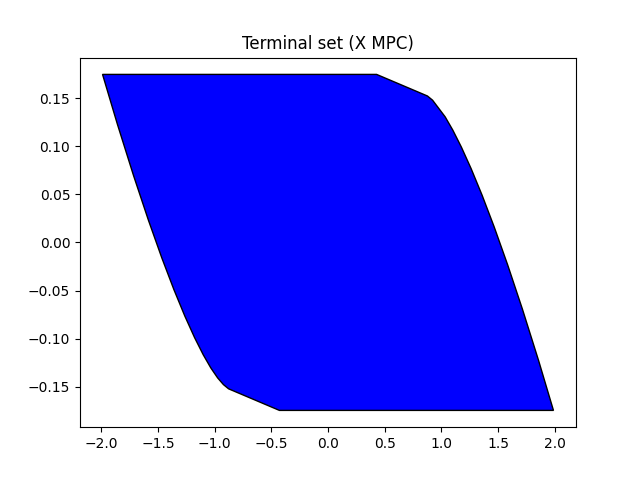

Maximum invariant set successfully computed after 15 iterations for Y MPC.


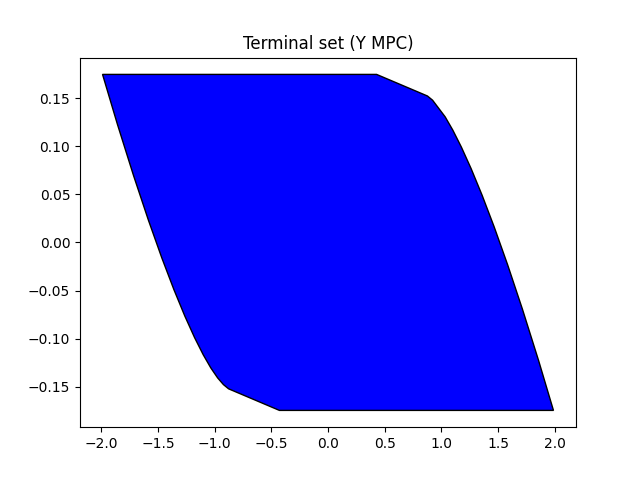

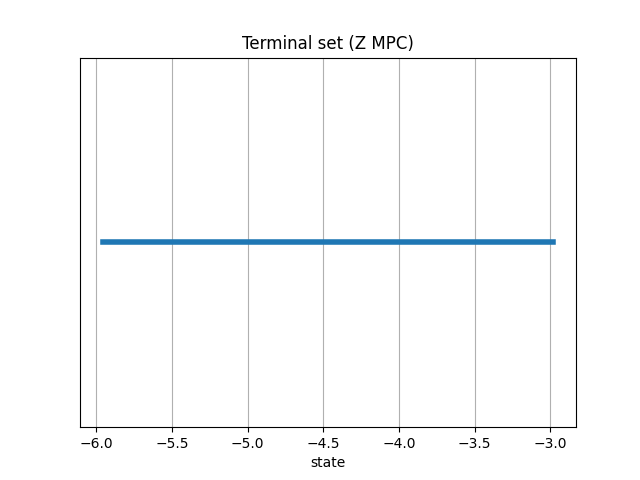

Maximum invariant set successfully computed after 46 iterations for Roll MPC.


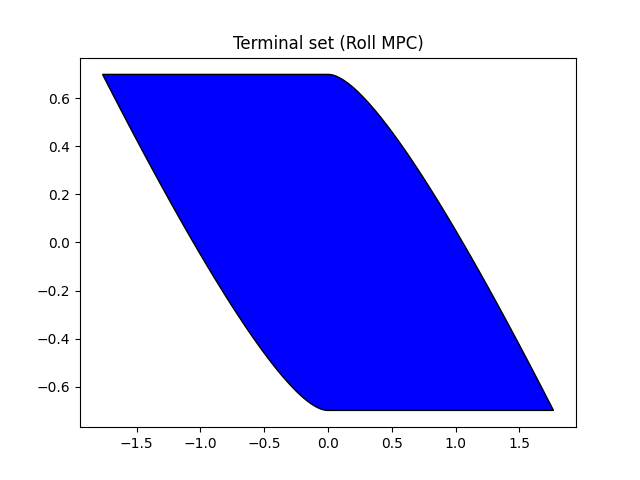

In [12]:
Ts = 0.05
sim_time = 5
H = 5
x0 = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(0), #gamma [rad] roll-MPC
               5, #vx [m/s] x-MPC
               5, #vy [m/s] y-MPC
               5, #vz [m/s] z-MPC
               0, #x [m]
               0, #y [m]
               0  #z [m]
               ])  # initial state       

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

Results plotting

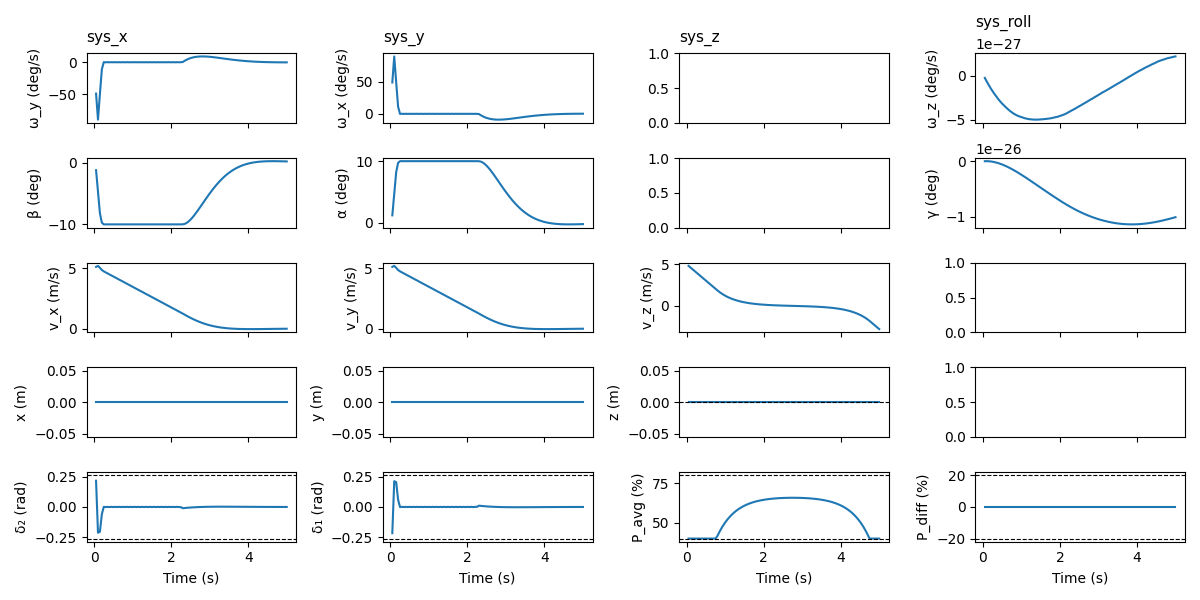

c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:520: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(5, 4, figsize=(12, 6), sharex=True)


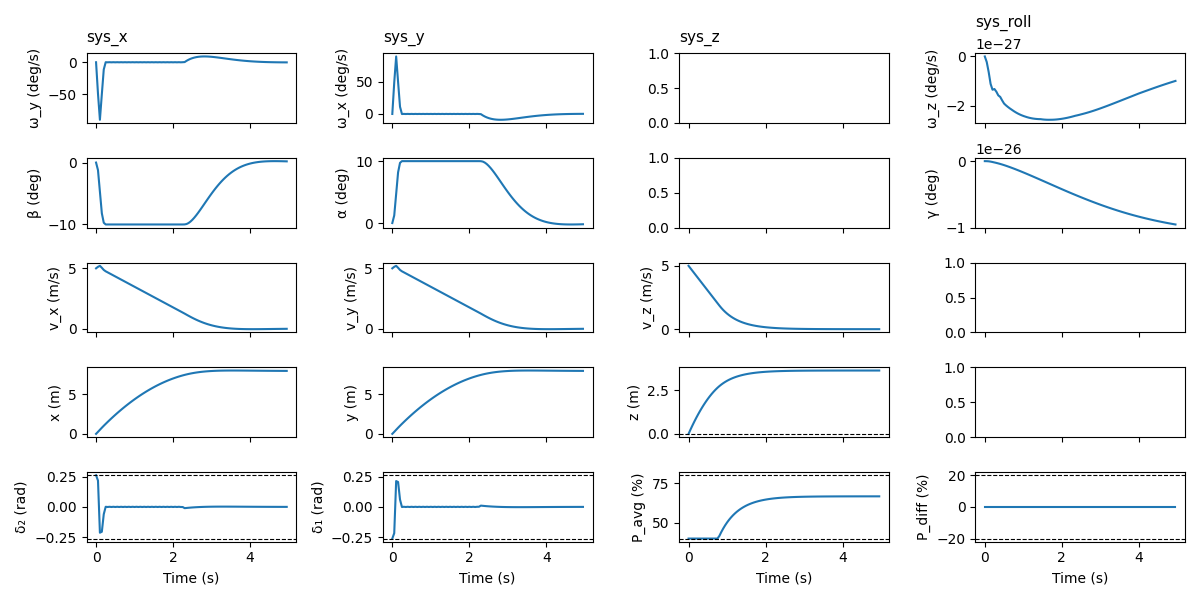

In [14]:
from src.vel_rocket_vis import plot_static_states_inputs
#Open Loop
plot_static_states_inputs(t_ol[:-1,1], x_ol[:,:-1,1], u_ol[...,1])
#Closed loop
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl)

Open loop Plotting

In [10]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1]*0, x_cl[:, :-1]*0, u_cl*0, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: divide by zero encountered in scalar divide
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))
c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: invalid value encountered in cast
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))


Closed Loop Plotting

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

Closed and Open Loop Plotting

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…